$$
\fbox{Projet Numérique: équations différentielles}
$$
$\underline{Mathilde~Ceripa~et~Maëlle~Thaller}$

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels unprédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent dela manière suivante : ̇
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(α−β \cdot {x_2})\\
        {x'_2}=−{x_2}(γ−δ \cdot {x_1})
    \end{array}
\right.
$$
où ${x_1}$ et ${x_2}$ désignent le nombre (positif) de proies et de prédateurs respectivement et $α,β,γ,δ$ sont des paramètres strictement positifs.

$\underline{inventaire~des~fonctions~du~cours~utilisées~dans~le~projet~:}$

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

alpha=2/3 
beta=4/3
gamma=1
delta=1 #valeurs trouvées sur wikipédia

# Python Standard Library
# -----------------------
pass

# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    sss

$\underline{Question~1:}$ 

Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre $(0,0)$ et ̄$̄x \in \mathbb{R_{>0}}×\mathbb{R_{>0}}$. Que peut-on dire de leur stabilité à ce stade ?

En identifiant dans les équations différentielles ci-dessus les différents termes, on peut affirmer que:
$$
\left\{ 
     \begin{array}
        \ \alpha: taux ~ de ~ reproduction ~ chez ~ les ~ proies\\
        \beta: taux~ de ~ mortalité~chez~les~proies~à~cause~des~prodateurs~(fonction ~ de~ la fréquence~ de ~ leurs ~roncontres)\\
        \gamma: taux ~ de ~ mortalité~naturelle~chez~les~prédateurs\\
        \delta: taux~de~reproduction~chez~les~prédateurs~(fonction~des~proies~rencontrées~et~mangées)
    \end{array}
\right.
$$

On souhaite à présent montrer qu'il existe deux points d'équilibre dans cette situation. On rappelle qu'on peut modéliser la situation ainsi:
On pose: 
$$
\overrightarrow{x}=\begin{pmatrix} 
    {x_1} \\ 
    {x_2} 
\end{pmatrix}
$$
et: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}\\ 
    -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1}
\end{pmatrix}
$$
On obtient alors l'équation différentielle suivante:
$$
\overrightarrow{x'}=f(\overrightarrow{x})
$$
Montrer qu'il existe deux points d'équilibre $̄x$ et $(0,0)$ revient alors à montrer que pour ces deux points: $f(\overrightarrow{x})=0$.

- On prend tout d'abord: $({x_1},{x_2})=(0,0)$. On a alors: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    0 \cdot \alpha - \beta \cdot 0 \cdot 0\\ 
    -0 \cdot \gamma + 0 \cdot \delta \cdot 0
\end{pmatrix} = \begin{pmatrix} 
    0 \\ 
    0
\end{pmatrix}
$$
Le couple $(0,0)$ est donc bien un point d'équilibre. 

- On pose à présent: $̄x=({x_1},{x_2})$. Il s'agit alors de résoudre le système suivant:
$$
\left\{ 
     \begin{array}
        \  {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}=0 \\
        -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1} =0 \\
        {x_1}>0 \\
        {x_2}>0
    \end{array}
\right.
$$
Il existe une solution à ce système, donc il existe bien un deuxième point d'équilibre $̄x=({x_1},{x_2})$ tel que ${x_1}>0$ et ${x_2}>0$ : 
$$
\overrightarrow{x}=\begin{pmatrix} 
    \frac{\gamma}{\delta} \\ 
    \frac{\alpha}{\beta}
\end{pmatrix}
$$

Pour étudier la stabilité de ces points d'équilibre, on va s'intéresser aux valeurs propres de la jacobienne de f évaluée en ces deux points,car $f:X→\mathbb{R_{2}}$ est continûment différentiable: 
$$
{J_f}=\begin{pmatrix} 
    \alpha - \beta \cdot {x_2} & -\beta \cdot {x_1}\\ 
    \delta \cdot {x_2} & -\gamma + \delta \cdot {x_1}
\end{pmatrix} 
$$

On a alors:
- En $({x_1},{x_2})=(0,0)$:
$$
Jf(0,0)=\begin{pmatrix} 
    \alpha & 0\\ 
    0 & -\gamma 
\end{pmatrix}
$$ 
qui a pour valeurs propres: ${\lambda_1}=\alpha$ et ${\lambda_2}=-\gamma$. Or, on sait que si une des parties réelles de ${\lambda_1}$ ou ${\lambda_2}$ est strictement positive, ce qui est le cas ici, le point d'équilibre est instable. Le point $(0,0)$ est donc $\underline{instable}$.
- En $({x_1},{x_2})=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ :
$$
Jf(\frac{\gamma}{\delta},\frac{\alpha}{\beta})=\begin{pmatrix} 
    0 & -\delta \cdot \frac{\gamma}{\delta}\\ 
    \delta \cdot \frac{\alpha}{\beta} & 0
\end{pmatrix}
$$ 
Après des caluls non détaillés ici, on obtient les valeurs propres suivantes: ${\lambda_1}=i \sqrt(\alpha \cdot \gamma)$ et ${\lambda_2}=-i \sqrt(\alpha \cdot \gamma)$. Ici, les deux parties réelles des valeurs propres sont nulles, et on ne peut donc pas en conclure la stabilité du point $x$ pour le moment.

$\underline{Question~2:}$

A l’aide des fonctions $meshgrid$ et $quiver$, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser $streamplot$ pour visualiser le portrait de phase.

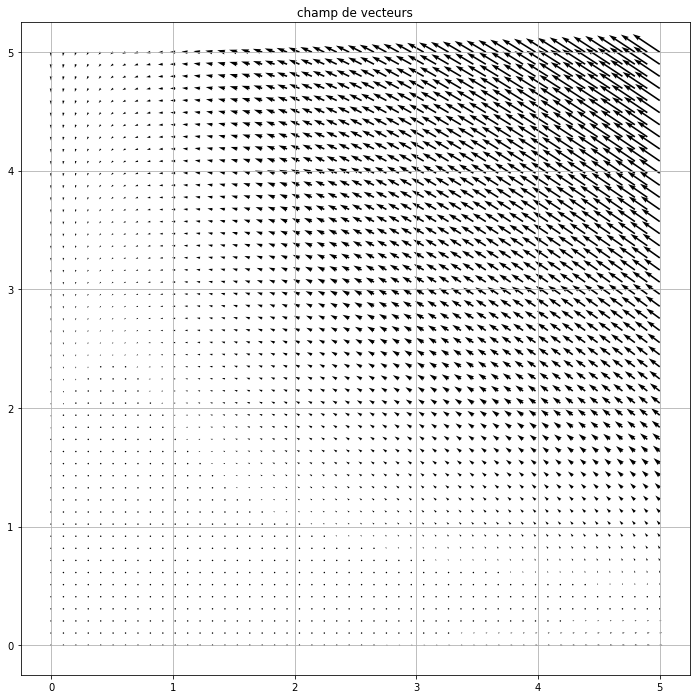

In [10]:
def f(x):
    x1,x2=x
    dx1=x1*2/3-4/3*x1*x2
    dx2=-x2*1+x2*x1*1
    return np.array([dx1,dx2])

'''champ de vecteurs'''
figure,ax=plt.subplots()

x1=np.linspace(0,5,50)
x2=np.linspace(0,5,50)
X,Y=np.meshgrid(x1,x2)
Z1,Z2=f([X,Y])
plt.quiver(X,Y,Z1,Z2)
plt.grid(True)
plt.title('champ de vecteurs')
plt.show();

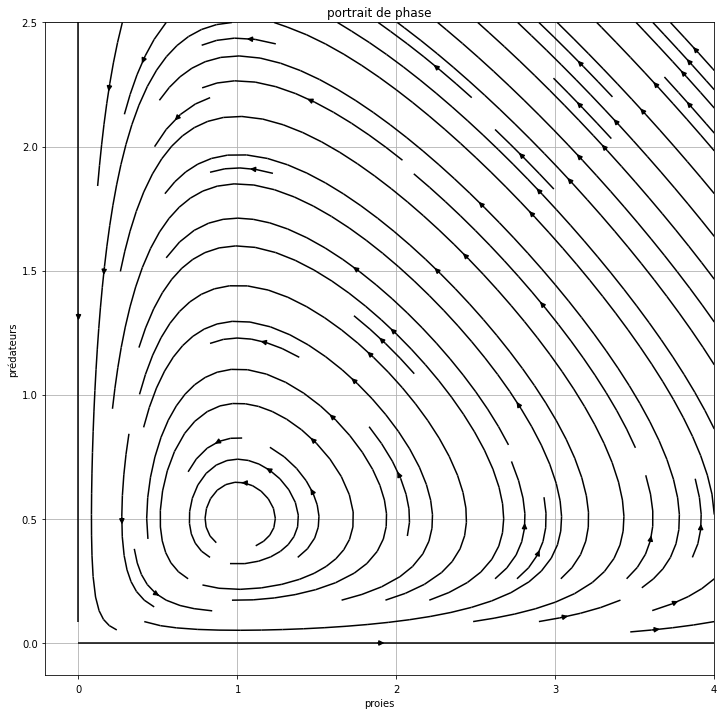

In [11]:
'''portrait de phase'''
plt.figure()
x1=np.linspace(0,4,100)
x2=np.linspace(0,2.5,100)
plt.grid(True)
plt.title('portrait de phase')
plt.xlabel('proies')
plt.ylabel('prédateurs')
plt.xticks([0, 1,2,3,4], ["$0$", "$1$", "$2$","$3$","$4$"])
plt.streamplot(*Q(f, x1, x2), color="k") ;

On observe grâce aux courbes précédentes que le portrait de phase présente des courbes fermées, ovales. On peut donc en déduire que les solutions seront périodiques. La forme non ronde de ces dernière suggère que l'évolution des deux populations est liée mais se fait de façon décalée, non simultanée. 

$\underline{Question~3:}$

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ reste dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ sur son ensemble de définition (ce qui est nécessaire pour que ${x_1}$ et ${x_2}$ représentent des populations réelles).

On sait que la fonction $f:X→\mathbb{R_{2}}$ explicitée précédemment est continuement différentiable. Ainsi, d'après le théorème de Cauchy Lipschitz, on peut affirmer que pour tout $\overrightarrow{x_0} \in \mathbb{R_{>0}}×\mathbb{R_{>0}}$, il existe une unique solution maximale $\overrightarrow{x}$ dans ${S_f}(\overrightarrow{x_0})$. 

D'après le théorème des valeurs intermédiaires, montrer qu'une solution initialisée dans $ \mathbb{R_{>0}} × \mathbb{R_{>0}} $ reste dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ revient à montrer qu'elle ne peut pas s'annuler.
- $x→0$ est une solution qui satisfait $\overrightarrow{x_0}=\overrightarrow{0}$ et donc, d'après le théorème précédent, l'unique solution maximale du problème de Cauchy 
$$
\left\{ 
     \begin{array}
        \ \overrightarrow{x'}=f(\overrightarrow{x}) \\
        \overrightarrow{x}(0)=\overrightarrow{0}
    \end{array}
\right.
$$
- Montrer ici que si jamais il existe une autre solution telle que ${x_k}(t)=0$ pour un $t$ donné, alors elle est nulle tout le temps et donc elle est confondue avec $x=0$ donc impossible. 


$\underline{Question~4:}$

On considère la fonction $H({x_1},{x_2}) =δ{x_1}−γln{x_1}+β{x_2}−αln{x_2}$ définie sur $\mathbb{R_{>0}}×\mathbb{R_{>0}}$. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$. En déduire que toute solution maximale initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ est définie sur $\mathbb{R}$.

- On a vu que pour une solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$, on a à tout instant t $({x_1}(t),{x_2}(t))\in \mathbb{R_{>0}}×\mathbb{R_{>0}}$, H est donc bien définie et dérivable le long des solutions initialisées dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$.
  
  Soit $({x_1},{x_2})$ une solution initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ et $I$ son intervalle de définition.
  
  $\forall t \in I$, $H'({x_1}(t),{x_2}(t))= δ \cdot {x'_1}(t)−γ \cdot \frac{{x'_1}(t)}{{x_1}(t)}+β \cdot {x'_2}(t)−α \cdot \frac{{x'_2}(t)}{{x_2}(t)}$
  
  Or on sait que :
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(α−β \cdot {x_2})\\
        {x'_2}=−{x_2}(γ−δ \cdot {x_1})
    \end{array}
\right.
$$

  Donc
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=δ \cdot {x_1}(α−β \cdot {x_2}) - γ \cdot (α−β \cdot {x_2}) - β \cdot {x_2}(γ−δ \cdot {x_1}) + α \cdot (γ−δ \cdot {x_1})$

  Finalement,
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=0$

  Donc $H$ est constante sur $I$.
  
  
  
- Montrons que $I=\mathbb{R}$

  
  On pose $I= ]a,b[$. En raisonnant par l'absurde, on suppose *a* et $b$ finis. 
  
  Comme $H$ est constante sur $I$, $({x_1},{x_2})$ est borné sur $I$ étant donné la forme de $H$, donc les limites de la norme de $x$ en a et b sont finies. D'après le théorème du domaine maximal d'existence, si a est fini, alors :
  
  $\lim\limits_{\substack{t \rightarrow a }} d((t,x(t)), \partial(\mathbb{R}×\mathbb{R^{n}})=0$, donc $a = -\infty$ ou $a= +\infty$, ce qui est absurde car on supposé $a$ fini.
  
  Donc $a=-\infty$, de même, $b=+\infty$.

  Par conséquent $I= \mathbb{R}$.
  Donc, toute solution maximale initialisée dans $\mathbb{R_{>0}}×\mathbb{R_{>0}}$ est définie sur $\mathbb{R}$.

$\underline{Question~5:}$

Représenter les courbes de niveau de H.  Où se trouve ̄x ? Qu’en conclut-onsur le comportement des solutions ? En déduire (graphiquement) que ̄x est stable, au sens de la définition de stabilité.


In [ ]:
def H(x1,x2):
    '''on implémente la fonction H'''
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

display_contour(
    H, 
    x=np.linspace(0, 1.0, 100), 
    y=np.linspace(0, 1.0, 100), 
    levels=15 # 10 levels, automatically selected
) ;


c:\users\mathi\miniconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
c:\users\mathi\miniconda3\lib\site-packages\autograd\numpy\numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


$\underline{Question~6:}$

Coder une fonction du type :

def solve_euler_explicit(f, x0, dt, t0, tf):

    ... 

    return t, x 

prenant en entrée une fonction $f : \mathbb{R}× \mathbb{R^{n}} → \mathbb{R^{n}}$ quelconque, une condition
initiale ${x_0}$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^{j}$ et de la solution $x^{j}$ du schéma d’Euler explicite appliqué à $x' = f(t, x)$. La tester sur une équation différentielle aux
solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$
tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

In [1]:
def solve_euler_explicit(f, x0, dt, t0, tf): #x0 est un vecteur colonne
    xj = x0
    tj = t0
    (n,a)=np.shape(x0)
    N = int(np.ceil((tf - t0) / dt))   #N est le nombre de fois qu'on va répéter la méthode
    x = np.zeros((N+1,n))
    x[0]=x0.T
    t = [t0]
    for j in range(N): 
        x[j+1] = x[j] + dt * f(t[j],x[j])
        t += [t[j] + dt]
    x=x.T
    return t, x          #chaque colonne de x correspond à un xj

Testons cette fonction pour l'équation $x'=1-x$ avec ${x_0}=0$, $dt=0.02$, ${t_0}=0$ et ${t_f}=10$.

On a $f(x,t)=1-x(t)$ à valeur dans $\mathbb{R}$ et l'unique solution de ce problème de Cauchy est x(t)=1-exp(-t).

In [2]:
def f(t,x):
    return (1-x)

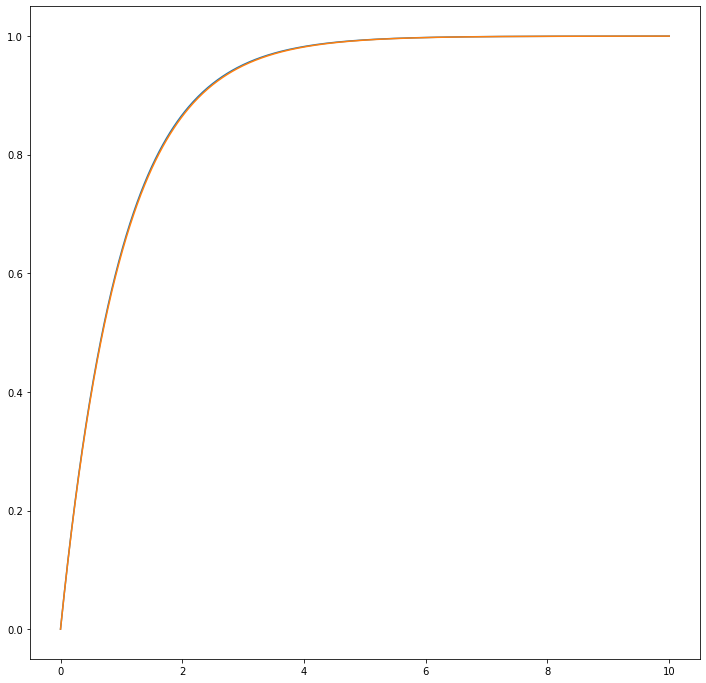

In [37]:
(t,xa) = solve_euler_explicit(f, np.array([[0]]), 0.02, 0, 10)
(i,j)=np.shape(xa)
x=xa[0]
y = [1-exp(-a) for a in t]
plt.plot(t,x)
plt.plot(t,y)

$\underline{Question~7:}$

Utiliser le schéma d’Euler explicite pour simuler les équations de LotkaVolterra. Que constate-t-on en temps long ? Cette résolution vous semblet-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction $H$.


$\underline{Question~8:}$

Coder maintenant une fonction du type :

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):

...

return t, x

donnant la solution d’un schéma d’Euler implicite appliqué à $x˙ = f(t, x)$ selon la méthode présentée dans le cours. 

Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les
équations de Lotka-Volterra ?

On propose maintenant de modifier ces schémas de façon à stabiliser H et assurer
sa conservation le long des solutions numériques.